import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from quantum_dynamics import Dynamics
import numpy as np
from ions import Chain
from ion_trap import IonTrap
import matplotlib.pylab as plt  
from laser import *

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from quantum_dynamics import Dynamics
import numpy as np
from ions import Chain
from ion_trap import IonTrap
#import matplotlib.pylab as plt  
from laser import *
import seaborn as sns
sns.set_context('poster')
#sns.set_context('paper')
#sns.set_context('poster')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
omegax = 2.0e6
omegaz = 150.e3
N = 9
chain = Chain(N, 2)
dummy_trap = IonTrap( omegax , omegaz)
dummy_trap.load(chain)
zpositions =   np.array( chain.get_positions() )
#harmonic potential couplings:
couplings_harmonic = chain.get_couplings()

In [5]:
def get_carrier_rf(pi_half_time, nbar=5, eta=.05):
    return np.pi / (2 * pi_half_time * eta * nbar**.5 )
    
motional_state = (1,0,0,0,0,0,0,0,0)
electronic_state = (1,0,0,0,0,0,0,0,0)
#laser = Laser( ion_num = 4, sideband_num = 1, intensity = 0, phase = 2*np.pi* 0, detuning=0)
#chain.set_thermal_motional_state( motional_state )
chain.set_pure_motional_state( motional_state )
chain.set_pure_electronic_state_numbers( electronic_state )
dyn_wout_laser = Dynamics(chain, lasers = [], pulses = [])
observables = [ dyn_wout_laser.a[0].dag() * dyn_wout_laser.a[0]]#, dyn_wout_laser.excited_state_pop[4] ]
time_interval = (0., 400.e-6)
time_precision = 2.e-6
times = np.arange(time_interval[0], time_interval[1], time_precision)
dyn_wout_laser.evolve_pure(time_interval, observables)

'''
pi_half_times = linspace(1.,5., 3) * 8.e-6
#intensity_arr = 2*np.pi* 280.e3 * linspace(0,1., 5)
intensity_arr = array([get_carrier_rf(time) for time in pi_half_times] + [0.])
output        = []

for intensity in intensity_arr:
    laser.intensity, laser.detuning = intensity,0# 2*np.pi* 20.e3 
    #chain.set_thermal_motional_state( motional_state )

    dyn_w_laser = Dynamics(chain, lasers = [], pulses = [])
    dyn_w_laser.evolve_pure(time_interval, observables)
    output.append(dyn_w_laser.expectations[0])
'''

TypeError: Incorrect hamiltonian specification

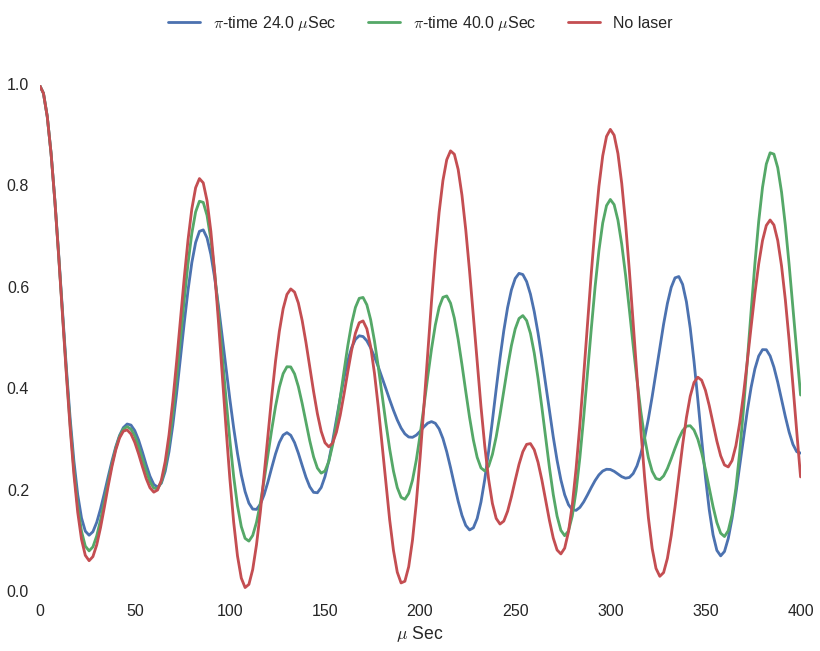

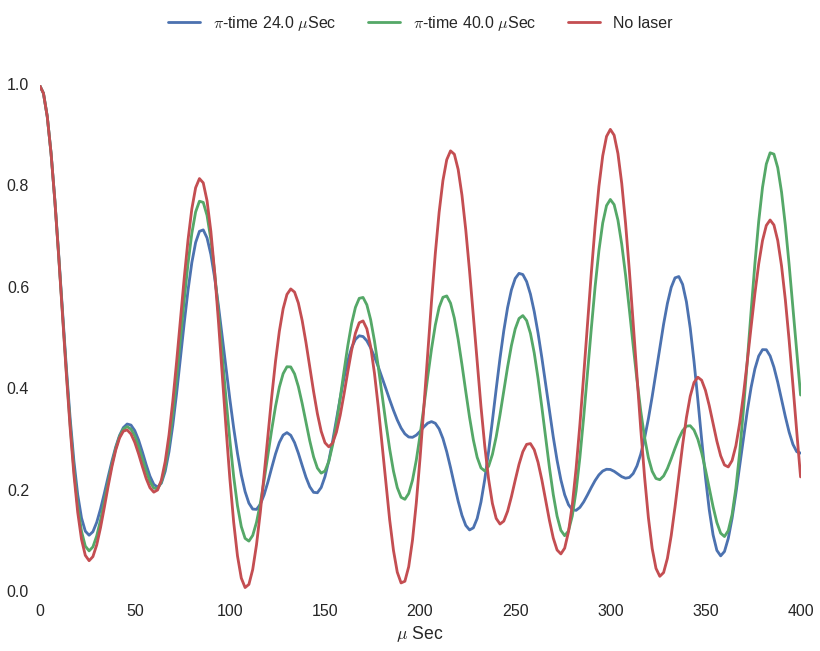

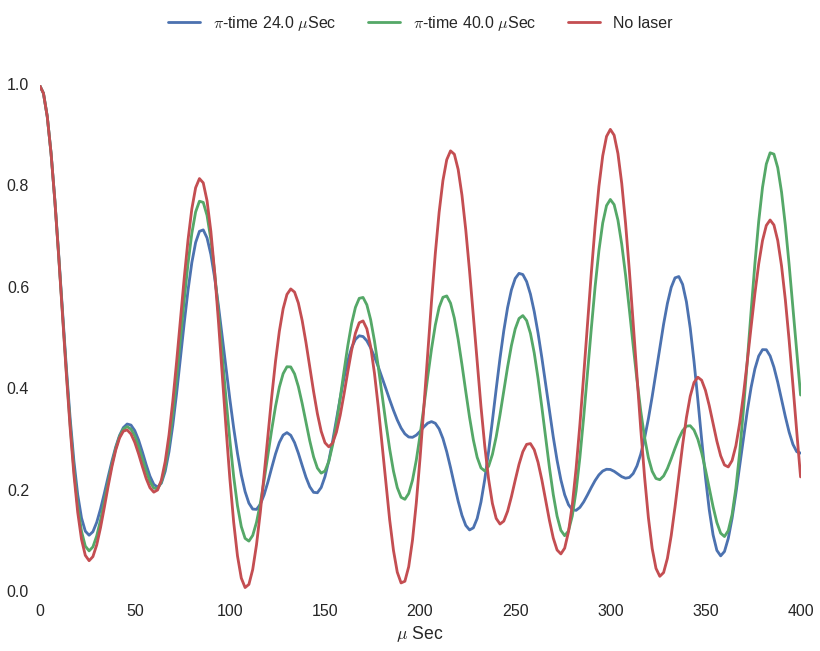

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
ax = plt.subplot(223)

for i in range(1,len(output)-1):
    plt.plot(times*1.e6, output[i], label='$\pi$-time {:.1f} $\mu$Sec'.format(pi_half_times[i]/1.e-6))

plt.plot(times*1.e6, output[-1], label='No laser')

# Place a legend to the right of this smaller figure.
#plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0., prop={'size':15})
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.17),
          ncol=3, fancybox=True, shadow=True)

sns.set_style("ticks")
plt.xlabel("$\mu$ Sec")
#plt.savefig('../Data_Storage/{}ions-laser_on_ion{}_InitState{}_{}KHzAxial_Rabifreq{}_Detuning{}.jpg'.format(N, laser.ion_num, motional_state,omegaz/1.e3, laser.intensity/(2*np.pi*1.e3), laser.detuning/(2*np.pi*1.e3), bbox_inches='tight'))


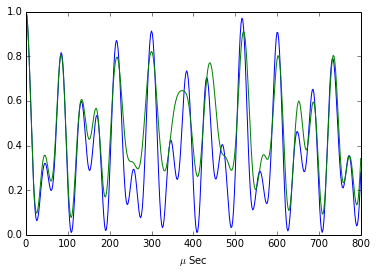

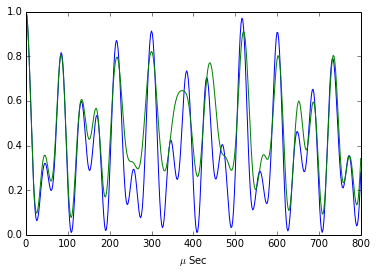

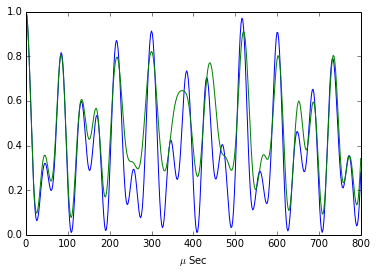

In [4]:
plt.plot(times*1.e6, dyn_wout_laser.expectations[0], times*1.e6, dyn_w_laser.expectations[0])
plt.xlabel("$\mu$ Sec")
#plt.savefig('../Data_Storage/{}ions-InitState{}_{}KHzAxial_Rabifreq{}_Detuning{}.jpg'.format(N, motional_state,omegaz/1.e3, laser.intensity/(2*np.pi*1.e3), laser.detuning/(2*np.pi*1.e3), bbox_inches='tight'))
plt.show()

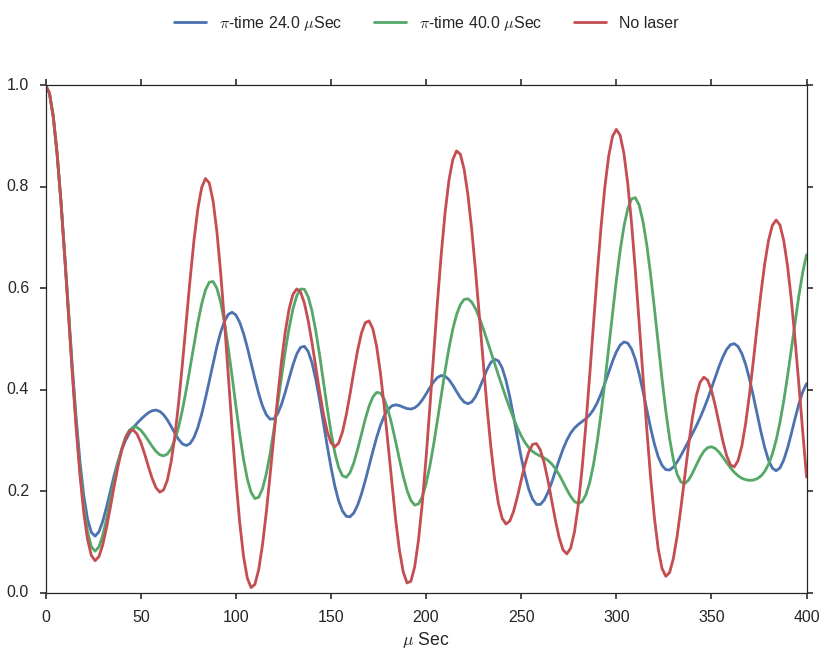

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
ax = plt.subplot(223)

for i in range(1,len(output)-1):
    plt.plot(times*1.e6, output[i], label='$\pi$-time {:.1f} $\mu$Sec'.format(pi_half_times[i]/1.e-6))

plt.plot(times*1.e6, output[-1], label='No laser')

# Place a legend to the right of this smaller figure.
#plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0., prop={'size':15})
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.17),
          ncol=3, fancybox=True, shadow=True)

sns.set_style("ticks")
plt.xlabel("$\mu$ Sec")
#plt.savefig('../Data_Storage/{}ions-laser_on_ion{}_InitState{}_{}KHzAxial_Rabifreq{}_Detuning{}.jpg'.format(N, laser.ion_num, motional_state,omegaz/1.e3, laser.intensity/(2*np.pi*1.e3), laser.detuning/(2*np.pi*1.e3), bbox_inches='tight'))
